In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

In [3]:
GBD_country_group = pd.read_excel(r'/Users/kediliukl/surfdrive/Documents/CML research/IIASA-YSSP/Liu_et_al_code_and_dataset /Code&Data for results/Data/Country Match/GBD_country_iso_codes.xlsx',sheet_name='Sheet4')

GBD_country_group

,Country,Region,GBD Region,Global,iso_code
0,Afghanistan,North Africa and Middle East,North Africa and Middle East,Global,AFG
1,Albania,Central Europe,"Central Europe, eastern Europe, and central Asia",Global,ALB
2,Algeria,North Africa and Middle East,North Africa and Middle East,Global,DZA
3,American Samoa,Oceania,"Southeast Asia, east Asia, and Oceania",Global,ASM
4,Andorra,Western Europe,High income,Global,AND
...,...,...,...,...,...
199,Viet Nam,Southeast Asia,"Southeast Asia, east Asia, and Oceania",Global,VNM
200,Virgin Islands,Caribbean,Latin America and Caribbean,Global,VIR
201,Yemen,North Africa and Middle East,North Africa and Middle East,Global,YEM
202,Zambia,Eastern sub- Saharan Africa,Sub-Saharan Africa,Global,ZMB


# Figure s-super region classification

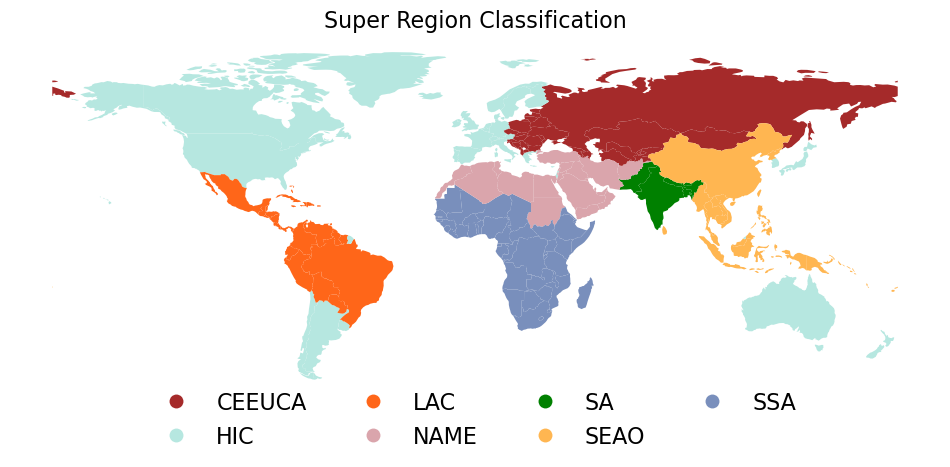

In [5]:
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")

gbd_regions = [
    'Central Europe, eastern Europe, and central Asia', 
    'High income', 
    'Latin America and Caribbean', 
    'North Africa and Middle East', 
    'South Asia', 
    'Southeast Asia, east Asia, and Oceania', 
    'Sub-Saharan Africa'
]

region_mapping = {
    'Central Europe, eastern Europe, and central Asia': 'CEEUCA',
    'High income': 'HIC',
    'Latin America and Caribbean': 'LAC',
    'North Africa and Middle East': 'NAME',
    'South Asia': 'SA',
    'Southeast Asia, east Asia, and Oceania': 'SEAO',
    'Sub-Saharan Africa': 'SSA'
}

gbd_colors = ['brown', '#B6E7E0', '#FF6619FF', '#DAA5AC', 'green', '#FFB651', '#798fbc']
color_map = dict(zip(region_mapping.values(), gbd_colors))  

world_with_regions = world.merge(
    GBD_country_group[['iso_code', 'GBD Region']], 
    left_on='ISO_A3_EH', 
    right_on='iso_code', 
    how='left'
)

world_with_regions['GBD Region'] = world_with_regions['GBD Region'].map(region_mapping)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

world_with_regions.plot(
    column='GBD Region', 
    ax=ax, 
    legend=True,
    cmap=mcolors.ListedColormap(gbd_colors),
    legend_kwds={
        'bbox_to_anchor': (0.5, -0.2), 
        'loc': 'lower center',         
        'ncol': 4,                       
        'frameon': False,                 
        'fontsize': 16
    }
)

ax.set_title('Super Region Classification', fontsize=16)
ax.set_axis_off()

plt.show()

In [4]:
pop = pd.read_csv(f'/Users/kediliukl/surfdrive/Documents/CML research/IIASA-YSSP/Liu_et_al_code_and_dataset /Code&Data for results/Data/SSP datasets/Population/pop.csv')

pop

,SSPs,Year,sex,Population,iso_code,age
0,SSP2,2020,m,3231.9,AFG,0
1,SSP2,2025,m,3527.3,AFG,0
2,SSP2,2030,m,3773.0,AFG,0
3,SSP2,2035,m,3943.3,AFG,0
4,SSP2,2040,m,4075.3,AFG,0
...,...,...,...,...,...,...
717565,SSP5,2080,f,8.3,ZWE,100
717566,SSP5,2085,f,15.4,ZWE,100
717567,SSP5,2090,f,22.0,ZWE,100
717568,SSP5,2095,f,31.3,ZWE,100


In [5]:
pop_2050 = pop[pop['Year'] == 2050].groupby(['SSPs','iso_code'])['Population'].sum().div(1e3).reset_index()
pop_2050

,SSPs,iso_code,Population
0,SSP1,ABW,0.1167
1,SSP1,AFG,68.1225
2,SSP1,AGO,60.1795
3,SSP1,ALB,2.2756
4,SSP1,ARE,11.4806
...,...,...,...
1000,SSP5,WSM,0.1930
1001,SSP5,YEM,47.5682
1002,SSP5,ZAF,68.5180
1003,SSP5,ZMB,31.8200


In [6]:
pop_all = pop.groupby(['SSPs', 'Year', 'iso_code','sex'])['Population'].sum().reset_index()

pop_all.columns = ['scen', 'Time', 'iso_code','sex','Population_total']

pop_all

,scen,Time,iso_code,sex,Population_total
0,SSP1,2020,ABW,f,56.4
1,SSP1,2020,ABW,m,50.1
2,SSP1,2020,AFG,f,18957.4
3,SSP1,2020,AFG,m,19368.5
4,SSP1,2020,AGO,f,16644.4
...,...,...,...,...,...
34165,SSP5,2100,ZAF,m,25518.3
34166,SSP5,2100,ZMB,f,18062.9
34167,SSP5,2100,ZMB,m,17281.1
34168,SSP5,2100,ZWE,f,9565.1


# cumulative premature deaths - regional 

In [7]:
change_cumu_deaths_fill = pd.read_csv('/Users/kediliukl/surfdrive/Documents/CML research/IIASA-YSSP/Liu_et_al_code_and_dataset /Code&Data for results/Data/Health outcomes/Premature Deaths/change_cumu_deaths_fill.csv').replace({'Scenario': {'ssp119': 'SSP1-1.9', 'ssp126': 'SSP1-2.6', 'ssp245': 'SSP2-4.5', 'ssp370': 'SSP3-7.0'}})

change_cumu_deaths_fill

,SSPs,Year,sex,iso_code,age,mx,Scenario,Population,COP_delta_mort_AVG_adjusted,COP_delta_mort_LOW_adjusted,...,LUN_delta_mort_HIGH_diff,STR_delta_mort_AVG_diff,STR_delta_mort_LOW_diff,STR_delta_mort_HIGH_diff,TDM_delta_mort_AVG_diff,TDM_delta_mort_LOW_diff,TDM_delta_mort_HIGH_diff,total_delta_mort_AVG_diff,total_delta_mort_LOW_diff,total_delta_mort_HIGH_diff
0,SSP1,2020,f,AFG,0.0,0.011760,SSP1-1.9,3087.40,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
1,SSP1,2021,f,AFG,0.0,0.011089,SSP1-1.9,3101.88,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-0.002506,-0.000021,-0.007346
2,SSP1,2022,f,AFG,0.0,0.010417,SSP1-1.9,3116.36,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-0.005012,-0.000041,-0.014692
3,SSP1,2023,f,AFG,0.0,0.009746,SSP1-1.9,3130.84,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-0.007518,-0.000062,-0.022039
4,SSP1,2024,f,AFG,0.0,0.009074,SSP1-1.9,3145.32,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-0.010024,-0.000083,-0.029385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972211,SSP3,2046,m,ZWE,100.0,0.482033,SSP3-7.0,0.10,0.000053,0.000036,...,1.458089e-07,0.000003,0.000002,0.000005,0.000002,5.125166e-07,0.000003,0.000057,0.000006,0.000157
972212,SSP3,2047,m,ZWE,100.0,0.481921,SSP3-7.0,0.10,0.000054,0.000037,...,1.441616e-07,0.000003,0.000002,0.000005,0.000001,4.958434e-07,0.000003,0.000056,0.000006,0.000153
972213,SSP3,2048,m,ZWE,100.0,0.481810,SSP3-7.0,0.10,0.000055,0.000038,...,1.425144e-07,0.000003,0.000002,0.000004,0.000001,4.791702e-07,0.000003,0.000054,0.000006,0.000149
972214,SSP3,2049,m,ZWE,100.0,0.481698,SSP3-7.0,0.10,0.000057,0.000039,...,1.408672e-07,0.000003,0.000002,0.000004,0.000001,4.624970e-07,0.000003,0.000053,0.000005,0.000145


In [8]:
cumu_deaths = change_cumu_deaths_fill.groupby(['SSPs','iso_code', 'Scenario'])[['total_delta_mort_AVG_adjusted','total_delta_mort_AVG_diff']].sum().div(1e3).reset_index()

cumu_deaths

,SSPs,iso_code,Scenario,total_delta_mort_AVG_adjusted,total_delta_mort_AVG_diff
0,SSP1,AFG,SSP1-1.9,0.277031,-0.009095
1,SSP1,AFG,SSP1-2.6,0.301399,-0.007176
2,SSP1,AGO,SSP1-1.9,0.273852,0.000828
3,SSP1,AGO,SSP1-2.6,0.273493,0.000816
4,SSP1,ALB,SSP1-1.9,0.017110,-0.000164
...,...,...,...,...,...
739,SSP3,WSM,SSP3-7.0,0.001537,0.000006
740,SSP3,YEM,SSP3-7.0,0.809626,0.034808
741,SSP3,ZAF,SSP3-7.0,0.563084,0.005496
742,SSP3,ZMB,SSP3-7.0,0.139569,-0.000211


In [9]:
cumu_deaths[cumu_deaths['iso_code'] == 'CHN']

,SSPs,iso_code,Scenario,total_delta_mort_AVG_adjusted,total_delta_mort_AVG_diff
62,SSP1,CHN,SSP1-1.9,32.882188,-1.325542
63,SSP1,CHN,SSP1-2.6,34.088876,-1.180850
403,SSP2,CHN,SSP2-4.5,46.518112,0.000000
589,SSP3,CHN,SSP3-7.0,74.885635,6.445626


In [10]:
cumu_deaths[cumu_deaths['iso_code'] == 'IND']

,SSPs,iso_code,Scenario,total_delta_mort_AVG_adjusted,total_delta_mort_AVG_diff
152,SSP1,IND,SSP1-1.9,35.072879,-6.537113
153,SSP1,IND,SSP1-2.6,41.163896,-5.614881
448,SSP2,IND,SSP2-4.5,64.967192,0.000000
634,SSP3,IND,SSP3-7.0,80.584959,5.013217


In [11]:
scatter_cumu_death = cumu_deaths.merge(GBD_country_group[['iso_code', 'GBD Region']], left_on='iso_code', right_on='iso_code', how='left')

scatter_cumu_death

,SSPs,iso_code,Scenario,total_delta_mort_AVG_adjusted,total_delta_mort_AVG_diff,GBD Region
0,SSP1,AFG,SSP1-1.9,0.277031,-0.009095,North Africa and Middle East
1,SSP1,AFG,SSP1-2.6,0.301399,-0.007176,North Africa and Middle East
2,SSP1,AGO,SSP1-1.9,0.273852,0.000828,Sub-Saharan Africa
3,SSP1,AGO,SSP1-2.6,0.273493,0.000816,Sub-Saharan Africa
4,SSP1,ALB,SSP1-1.9,0.017110,-0.000164,"Central Europe, eastern Europe, and central Asia"
...,...,...,...,...,...,...
739,SSP3,WSM,SSP3-7.0,0.001537,0.000006,"Southeast Asia, east Asia, and Oceania"
740,SSP3,YEM,SSP3-7.0,0.809626,0.034808,North Africa and Middle East
741,SSP3,ZAF,SSP3-7.0,0.563084,0.005496,Sub-Saharan Africa
742,SSP3,ZMB,SSP3-7.0,0.139569,-0.000211,Sub-Saharan Africa


In [32]:
scatter_cumu_death.groupby(['Scenario','Year','GBD Region'])[['total_delta_mort_AVG_adjusted','total_delta_mort_AVG_diff']].sum().reset_index()

KeyError: 'Year'

In [12]:
scatter_cumu_death_pop_2050 = scatter_cumu_death.merge(pop_2050,on=['SSPs','iso_code'], how='left')

scatter_cumu_death_pop_2050

,SSPs,iso_code,Scenario,total_delta_mort_AVG_adjusted,total_delta_mort_AVG_diff,GBD Region,Population
0,SSP1,AFG,SSP1-1.9,0.277031,-0.009095,North Africa and Middle East,68.1225
1,SSP1,AFG,SSP1-2.6,0.301399,-0.007176,North Africa and Middle East,68.1225
2,SSP1,AGO,SSP1-1.9,0.273852,0.000828,Sub-Saharan Africa,60.1795
3,SSP1,AGO,SSP1-2.6,0.273493,0.000816,Sub-Saharan Africa,60.1795
4,SSP1,ALB,SSP1-1.9,0.017110,-0.000164,"Central Europe, eastern Europe, and central Asia",2.2756
...,...,...,...,...,...,...,...
739,SSP3,WSM,SSP3-7.0,0.001537,0.000006,"Southeast Asia, east Asia, and Oceania",0.3364
740,SSP3,YEM,SSP3-7.0,0.809626,0.034808,North Africa and Middle East,58.8082
741,SSP3,ZAF,SSP3-7.0,0.563084,0.005496,Sub-Saharan Africa,68.5925
742,SSP3,ZMB,SSP3-7.0,0.139569,-0.000211,Sub-Saharan Africa,36.8961


# life expectancy at birth - regional 

In [24]:
leab = pd.read_csv('/Users/kediliukl/surfdrive/Documents/CML research/IIASA-YSSP/Liu_et_al_code_and_dataset /Code&Data for results/Data/Health outcomes/Life Expectancy/leab.csv')

leab = leab.merge(pop_all,on=['scen', 'Time', 'iso_code','sex'],how='left')

leab = leab.rename(columns={'scen': 'SSPs'})

leab

,SSPs,Time,sex,agest,iso_code,Scenario,ex,ex.new_AVG,ex.new_LOW,ex.new_HIGH,ex_diff_AVG,ex_diff_LOW,ex_diff_HIGH,Population_total
0,SSP1,2020.0,f,0,AFG,ssp119,65.431991,65.431990,65.431990,65.431990,-5.518742e-07,-5.518743e-07,-5.518742e-07,18957.4
1,SSP1,2025.0,f,0,AFG,ssp119,68.461696,68.622891,68.527668,68.767564,1.611945e-01,6.597164e-02,3.058678e-01,21676.2
2,SSP1,2030.0,f,0,AFG,ssp119,69.747324,69.880055,69.800141,70.003453,1.327315e-01,5.281701e-02,2.561291e-01,24380.3
3,SSP1,2035.0,f,0,AFG,ssp119,71.029809,71.125210,71.067723,71.216743,9.540132e-02,3.791385e-02,1.869339e-01,26966.3
4,SSP1,2040.0,f,0,AFG,ssp119,72.227582,72.409434,72.297581,72.593215,1.818513e-01,6.999868e-02,3.656327e-01,29377.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10491,SSP3,2030.0,m,0,ZWE,ssp370,55.744436,55.708408,55.734799,55.671117,-3.602813e-02,-9.637199e-03,-7.331932e-02,8882.4
10492,SSP3,2035.0,m,0,ZWE,ssp370,56.193848,56.183074,56.190928,56.173299,-1.077408e-02,-2.920066e-03,-2.054928e-02,9673.0
10493,SSP3,2040.0,m,0,ZWE,ssp370,56.624089,56.561985,56.607761,56.499813,-6.210442e-02,-1.632834e-02,-1.242763e-01,10454.4
10494,SSP3,2045.0,m,0,ZWE,ssp370,57.042715,56.927719,57.013094,56.805294,-1.149960e-01,-2.962166e-02,-2.374215e-01,11188.4


In [16]:
leab_global_2050 = leab[leab['Time'] == 2050].groupby(['SSPs','Scenario','iso_code']).apply(
    lambda group: pd.Series({
        'weighted_ex': (group['ex'] * group['Population_total']).sum() / group['Population_total'].sum(),
        'weighted_ex.new_AVG': (group['ex.new_AVG'] * group['Population_total']).sum() / group['Population_total'].sum(),
        'weighted_ex.new_LOW': (group['ex.new_LOW'] * group['Population_total']).sum() / group['Population_total'].sum(),
        'weighted_ex.new_HIGH': (group['ex.new_HIGH'] * group['Population_total']).sum() / group['Population_total'].sum(),

    })
).reset_index()

leab_global_avg_diff = leab.groupby(['SSPs','Scenario','Time','iso_code']).apply(
    lambda group: pd.Series({
        'avg_ex_diff_AVG': (group['ex_diff_AVG'] * group['Population_total']).sum() / group['Population_total'].sum(),
        'avg_ex_diff_LOW': (group['ex_diff_LOW'] * group['Population_total']).sum() / group['Population_total'].sum(),
        'avg_ex_diff_HIGH': (group['ex_diff_HIGH'] * group['Population_total']).sum() / group['Population_total'].sum(),
    })
).reset_index().groupby(['SSPs','Scenario','iso_code'])[['avg_ex_diff_AVG','avg_ex_diff_LOW','avg_ex_diff_HIGH']].mean().reset_index()


leab_global_combined = pd.merge(
    leab_global_2050, leab_global_avg_diff, 
    on=['SSPs','Scenario', 'iso_code'], 
    suffixes=('_2050', '_diff')
)

leab_global_combined = leab_global_combined.replace({'Scenario': {'ssp119': 'SSP1-1.9', 'ssp126': 'SSP1-2.6', 'ssp245': 'SSP2-4.5', 'ssp370': 'SSP3-7.0'}})

leab_global_combined


/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_23933/691484619.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  leab_global_2050 = leab[leab['Time'] == 2050].groupby(['SSPs','Scenario','iso_code']).apply(
/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_23933/691484619.py:13: RuntimeWarning: invalid value encountered in scalar divide
  'avg_ex_diff_AVG': (group['ex_diff_AVG'] * group['Population_total']).sum() / group['Population_total'].sum(),
/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_23933/691484619.py:14: RuntimeWarning: invalid value encountered in scalar divide
  'avg_ex_diff_LOW': (group['ex_diff_LOW'] * group['Population_total']).sum() / group['Pop

,SSPs,Scenario,iso_code,weighted_ex,weighted_ex.new_AVG,weighted_ex.new_LOW,weighted_ex.new_HIGH,avg_ex_diff_AVG,avg_ex_diff_LOW,avg_ex_diff_HIGH
0,SSP1,SSP1-1.9,AFG,72.271200,72.356243,72.305929,72.442228,0.139931,0.059664,0.266370
1,SSP1,SSP1-1.9,AGO,71.710129,71.655789,71.690925,71.600912,-0.007908,-0.002681,-0.016249
2,SSP1,SSP1-1.9,ALB,89.738207,89.809981,89.772557,89.873242,0.048964,0.026376,0.084074
3,SSP1,SSP1-1.9,ARE,89.188076,89.201287,89.192671,89.216018,0.083557,0.033409,0.162959
4,SSP1,SSP1-1.9,ARG,88.211872,88.074590,88.168217,87.934689,-0.204123,-0.083878,-0.353945
...,...,...,...,...,...,...,...,...,...,...
739,SSP3,SSP3-7.0,WSM,76.877605,76.880937,76.879036,76.883864,-0.014191,-0.006823,-0.025513
740,SSP3,SSP3-7.0,YEM,67.397774,67.049514,67.259745,66.717839,-0.160003,-0.066006,-0.304507
741,SSP3,SSP3-7.0,ZAF,61.054161,60.994715,61.031832,60.942934,-0.033143,-0.013044,-0.059644
742,SSP3,SSP3-7.0,ZMB,59.257074,59.248423,59.254470,59.238835,0.001379,0.000374,0.003182


In [17]:
scatter_leab = leab_global_combined.merge(GBD_country_group[['iso_code', 'GBD Region']], left_on='iso_code', right_on='iso_code', how='left')

scatter_leab

,SSPs,Scenario,iso_code,weighted_ex,weighted_ex.new_AVG,weighted_ex.new_LOW,weighted_ex.new_HIGH,avg_ex_diff_AVG,avg_ex_diff_LOW,avg_ex_diff_HIGH,GBD Region
0,SSP1,SSP1-1.9,AFG,72.271200,72.356243,72.305929,72.442228,0.139931,0.059664,0.266370,North Africa and Middle East
1,SSP1,SSP1-1.9,AGO,71.710129,71.655789,71.690925,71.600912,-0.007908,-0.002681,-0.016249,Sub-Saharan Africa
2,SSP1,SSP1-1.9,ALB,89.738207,89.809981,89.772557,89.873242,0.048964,0.026376,0.084074,"Central Europe, eastern Europe, and central Asia"
3,SSP1,SSP1-1.9,ARE,89.188076,89.201287,89.192671,89.216018,0.083557,0.033409,0.162959,North Africa and Middle East
4,SSP1,SSP1-1.9,ARG,88.211872,88.074590,88.168217,87.934689,-0.204123,-0.083878,-0.353945,High income
...,...,...,...,...,...,...,...,...,...,...,...
739,SSP3,SSP3-7.0,WSM,76.877605,76.880937,76.879036,76.883864,-0.014191,-0.006823,-0.025513,"Southeast Asia, east Asia, and Oceania"
740,SSP3,SSP3-7.0,YEM,67.397774,67.049514,67.259745,66.717839,-0.160003,-0.066006,-0.304507,North Africa and Middle East
741,SSP3,SSP3-7.0,ZAF,61.054161,60.994715,61.031832,60.942934,-0.033143,-0.013044,-0.059644,Sub-Saharan Africa
742,SSP3,SSP3-7.0,ZMB,59.257074,59.248423,59.254470,59.238835,0.001379,0.000374,0.003182,Sub-Saharan Africa


In [31]:
scatter_leab[
    (scatter_leab['Scenario'] == 'SSP3-7.0') 
].sort_values(
    by=['avg_ex_diff_AVG'], 
    ascending=False
).head(10)

,SSPs,Scenario,iso_code,weighted_ex,weighted_ex.new_AVG,weighted_ex.new_LOW,weighted_ex.new_HIGH,avg_ex_diff_AVG,avg_ex_diff_LOW,avg_ex_diff_HIGH,GBD Region
622,SSP3,SSP3-7.0,GNB,58.060552,58.195162,58.107179,58.337451,0.106401,0.035950,0.213654,Sub-Saharan Africa
621,SSP3,SSP3-7.0,GMB,66.110294,66.200896,66.143837,66.291196,0.105038,0.040612,0.204180,Sub-Saharan Africa
702,SSP3,SSP3-7.0,SEN,69.913566,69.944562,69.925944,69.973438,0.079877,0.034348,0.148045,Sub-Saharan Africa
734,SSP3,SSP3-7.0,UZB,74.633992,74.604308,74.619186,74.583644,0.061042,0.032915,0.098393,"Central Europe, eastern Europe, and central Asia"
707,SSP3,SSP3-7.0,SOM,59.819664,59.775342,59.809459,59.715548,0.056917,0.013299,0.127963,Sub-Saharan Africa
710,SSP3,SSP3-7.0,STP,70.157685,70.200505,70.171947,70.245792,0.041784,0.015554,0.079834,Sub-Saharan Africa
666,SSP3,SSP3-7.0,MLI,61.070018,61.103083,61.081724,61.137937,0.040096,0.014319,0.082042,Sub-Saharan Africa
718,SSP3,SSP3-7.0,TCD,57.455316,57.481588,57.464238,57.510255,0.030262,0.010397,0.061076,Sub-Saharan Africa
676,SSP3,SSP3-7.0,NAM,61.457568,61.503941,61.471931,61.556709,0.028812,0.009300,0.060443,Sub-Saharan Africa
564,SSP3,SSP3-7.0,ATG,78.609378,78.588862,78.602036,78.567491,0.020757,0.009465,0.036588,Latin America and Caribbean


In [18]:
scatter_leab_pop_2050 = scatter_leab.merge(pop_2050,on=['SSPs','iso_code'], how='left')

scatter_leab_pop_2050

,SSPs,Scenario,iso_code,weighted_ex,weighted_ex.new_AVG,weighted_ex.new_LOW,weighted_ex.new_HIGH,avg_ex_diff_AVG,avg_ex_diff_LOW,avg_ex_diff_HIGH,GBD Region,Population
0,SSP1,SSP1-1.9,AFG,72.271200,72.356243,72.305929,72.442228,0.139931,0.059664,0.266370,North Africa and Middle East,68.1225
1,SSP1,SSP1-1.9,AGO,71.710129,71.655789,71.690925,71.600912,-0.007908,-0.002681,-0.016249,Sub-Saharan Africa,60.1795
2,SSP1,SSP1-1.9,ALB,89.738207,89.809981,89.772557,89.873242,0.048964,0.026376,0.084074,"Central Europe, eastern Europe, and central Asia",2.2756
3,SSP1,SSP1-1.9,ARE,89.188076,89.201287,89.192671,89.216018,0.083557,0.033409,0.162959,North Africa and Middle East,11.4806
4,SSP1,SSP1-1.9,ARG,88.211872,88.074590,88.168217,87.934689,-0.204123,-0.083878,-0.353945,High income,48.7468
...,...,...,...,...,...,...,...,...,...,...,...,...
739,SSP3,SSP3-7.0,WSM,76.877605,76.880937,76.879036,76.883864,-0.014191,-0.006823,-0.025513,"Southeast Asia, east Asia, and Oceania",0.3364
740,SSP3,SSP3-7.0,YEM,67.397774,67.049514,67.259745,66.717839,-0.160003,-0.066006,-0.304507,North Africa and Middle East,58.8082
741,SSP3,SSP3-7.0,ZAF,61.054161,60.994715,61.031832,60.942934,-0.033143,-0.013044,-0.059644,Sub-Saharan Africa,68.5925
742,SSP3,SSP3-7.0,ZMB,59.257074,59.248423,59.254470,59.238835,0.001379,0.000374,0.003182,Sub-Saharan Africa,36.8961


# Figure 3 

/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_23933/2076801415.py:316: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])
/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_23933/2076801415.py:329: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.01, 0.01, 0.1, 0.1])


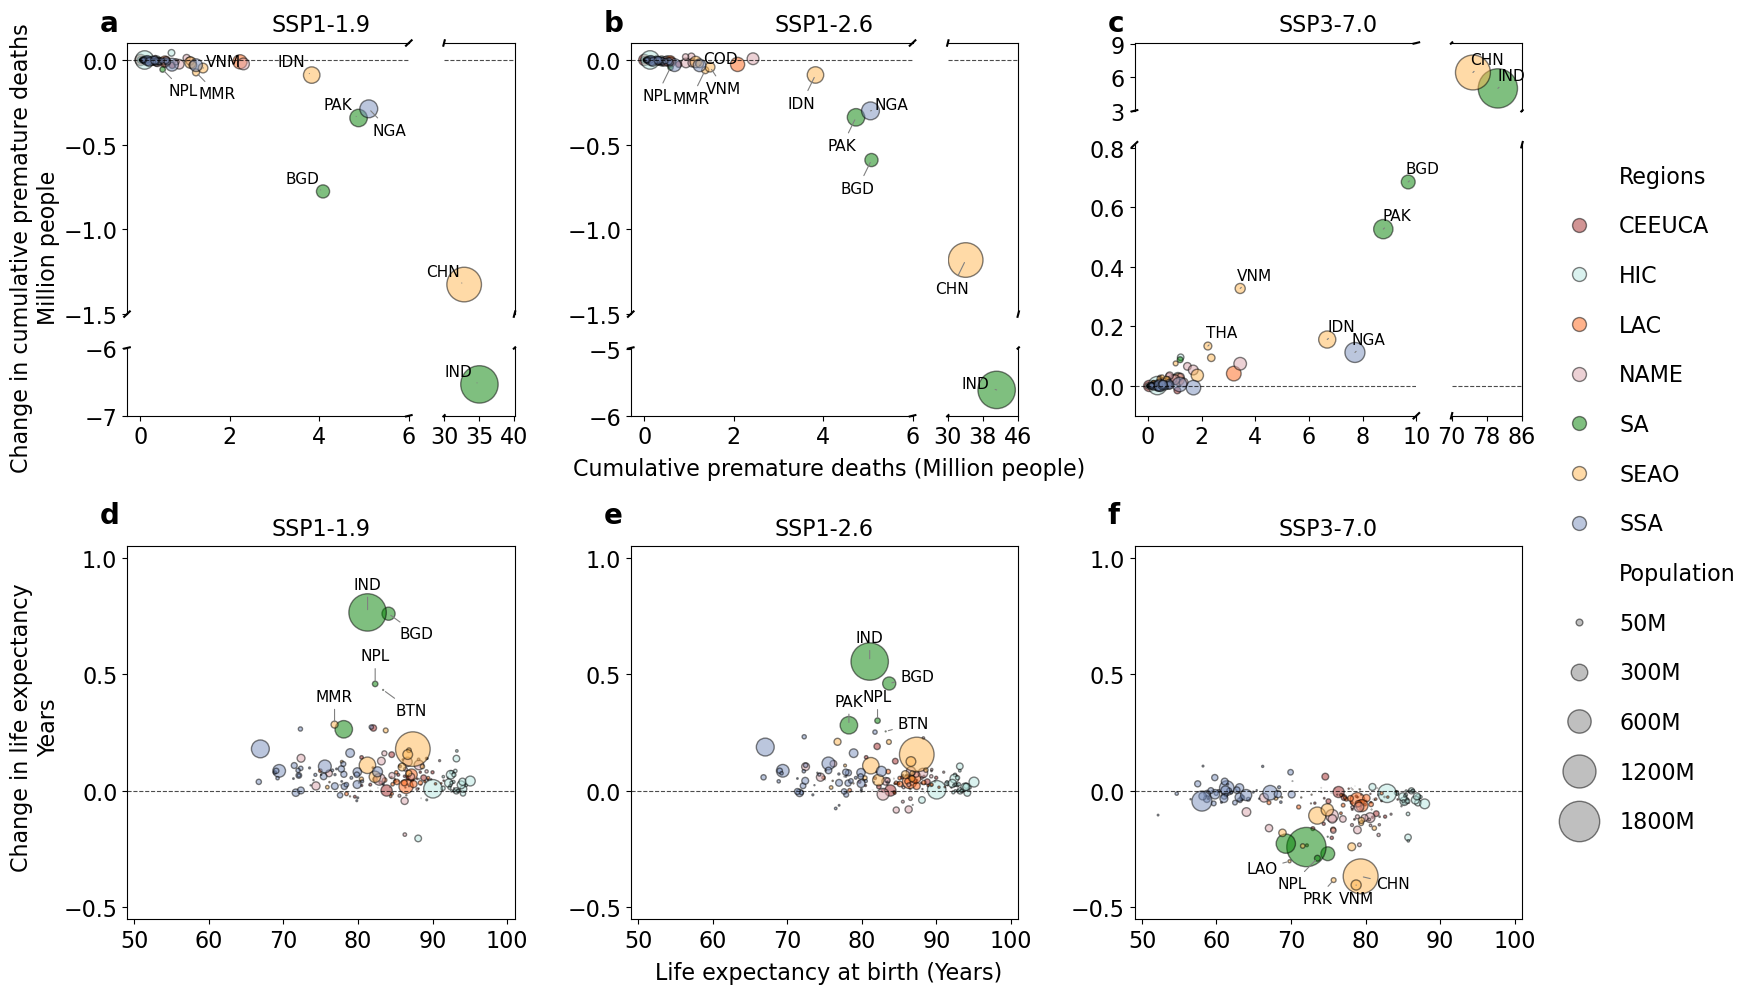

In [20]:
region_mapping = {
    'Central Europe, eastern Europe, and central Asia': 'CEEUCA',
    'High income': 'HIC',
    'Latin America and Caribbean': 'LAC',
    'North Africa and Middle East': 'NAME',
    'South Asia': 'SA',
    'Southeast Asia, east Asia, and Oceania': 'SEAO',
    'Sub-Saharan Africa': 'SSA',

}
colors = ['brown', '#B6E7E0', '#FF6619FF', '#DAA5AC', 'green', '#FFB651', '#798fbc']
region_color_map = dict(zip(region_mapping.values(), colors))

fig = plt.figure(figsize=(18, 12))
outer_grid = GridSpec(2, 3, figure=fig, wspace=0.3, hspace=0.35)

scenarios = ['SSP1-1.9', 'SSP1-2.6', 'SSP3-7.0']
scenario_params = {
    'SSP1-1.9': {
        'xlims': [(-0.3, 6), (30, 40.1)],
        'ylims': [(-1.5, 0.1), (-7, -6)],
        'xticks': [np.arange(0, 7, 2), np.arange(30, 40.1, 5)],
        'yticks': [np.arange(-1.5, 0.1, 0.5), np.arange(-7, -5.9, 1)],
        'height_ratios': [4, 1],
        'width_ratios': [4, 1],
        'top_values': 'nsmallest',
        'offsets': {
            'NPL': (15, -10), 'MMR': (15, -10), 'NGA': (15, -10),
            'VNM': (15, 10), 'default': (-15, 15)
        },
        'n_values': 9
    },
    'SSP1-2.6': {
        'xlims': [(-0.3, 6), (30, 46.1)],
        'ylims': [(-1.5, 0.1), (-6, -4.99)],
        'xticks': [np.arange(0, 7, 2), np.arange(30, 46.1, 8)],
        'yticks': [np.arange(-1.5, 0.1, 0.5), np.arange(-6, -4.99, 1)],
        'height_ratios': [4, 1],
        'width_ratios': [4, 1],
        'top_values': 'nsmallest',
        'offsets': {
            'COD': (15, 10), 'NGA': (15, 10),'IND': (-15, 10),
            'VNM': (10, -10), 'default': (-10, -15)
        },
        'n_values': 10
    },
    'SSP3-7.0': {
        'xlims': [(-0.5, 10), (70, 86.1)],
        'ylims': [(3, 9.1), (-0.1, 0.81)],
        'xticks': [np.arange(0, 10.01, 2), np.arange(70, 86.1, 8)],
        'yticks': [np.arange(3,9.1, 3), np.arange(-0, 0.81, 0.2)],
        'height_ratios': [1, 4],
        'width_ratios': [4, 1],
        'top_values': 'nlargest',
        'offsets': {
            'MMR': (25, 0), 'default': (10, 15)
        },
        'n_values': 8
    }
}

scatter_cumu_death_pop_2050['GBD Region Short'] = scatter_cumu_death_pop_2050['GBD Region'].map(region_mapping)
scatter_leab_pop_2050['GBD Region Short'] = scatter_leab_pop_2050['GBD Region'].map(region_mapping)

for df in [scatter_cumu_death_pop_2050, scatter_leab_pop_2050]:
    pop_min = df['Population'].min()
    pop_max = df['Population'].max()
    df['pop_scaled'] = 800 * ((df['Population'] - pop_min) / (pop_max - pop_min))

for pos, scenario in enumerate(scenarios):
    params = scenario_params[scenario]
    df_scenario = scatter_cumu_death_pop_2050[scatter_cumu_death_pop_2050['Scenario'] == scenario]
    
    top_values_method = getattr(df_scenario, params['top_values'])
    top_values = top_values_method(params['n_values'], 'total_delta_mort_AVG_diff')
    
    inner_grid = outer_grid[0, pos].subgridspec(2, 2, 
                        height_ratios=params['height_ratios'], 
                        width_ratios=params['width_ratios'],
                        wspace=0.2, hspace=0.2)
    
    ax1 = fig.add_subplot(inner_grid[0, 0])
    ax2 = fig.add_subplot(inner_grid[0, 1])
    ax3 = fig.add_subplot(inner_grid[1, 0])
    ax4 = fig.add_subplot(inner_grid[1, 1])
    
    for region, color in region_color_map.items():
        df_region = df_scenario[df_scenario['GBD Region Short'] == region]
        for ax in [ax1, ax2, ax3, ax4]:
            ax.scatter(
                df_region['total_delta_mort_AVG_adjusted'],
                df_region['total_delta_mort_AVG_diff'],
                s=df_region['pop_scaled'],
                label=region,
                color=color,
                alpha=0.5,
                edgecolors='k'
            )
    
    for i, row in top_values.iterrows():
        if row['iso_code'] in params['offsets']:
            offset = params['offsets'][row['iso_code']]
        else:
            offset = params['offsets']['default']
            
        for ax in [ax1, ax2, ax3, ax4]:
            ax.annotate(
                row['iso_code'],
                (row['total_delta_mort_AVG_adjusted'], row['total_delta_mort_AVG_diff']),
                textcoords="offset points", xytext=offset,
                ha='center',va='top', fontsize=11, color='black',
                arrowprops=dict(arrowstyle='-', color='gray', lw=0.8)
            )
    
    ax1.set_xlim(params['xlims'][0]); ax2.set_xlim(params['xlims'][1])
    ax3.set_xlim(params['xlims'][0]); ax4.set_xlim(params['xlims'][1])
    ax1.set_ylim(params['ylims'][0]); ax2.set_ylim(params['ylims'][0])
    ax3.set_ylim(params['ylims'][1]); ax4.set_ylim(params['ylims'][1])
    
    ax1.set_yticks(params['yticks'][0])
    ax1.set_xticks(params['xticks'][0])
    ax2.set_yticks(params['yticks'][0])
    ax2.set_xticks(params['xticks'][1])
    ax3.set_yticks(params['yticks'][1])
    ax3.set_xticks(params['xticks'][0])
    ax4.set_yticks(params['yticks'][1])
    ax4.set_xticks(params['xticks'][1])
    
    for ax in [ax1, ax2, ax3, ax4]:
        ax.tick_params(axis='both', labelsize=16)

    ax1.tick_params(axis='x', which='both', length=0)
    ax2.tick_params(axis='both', which='both', length=0)
    ax4.tick_params(axis='y', which='both', length=0)

    ax1.set_xticklabels([])
    ax2.set_xticklabels([])
    ax2.set_yticklabels([])
    ax4.set_yticklabels([])

    for a in [ax1, ax3]: a.spines['right'].set_visible(False)
    for a in [ax2, ax4]: a.spines['left'].set_visible(False)
    for a in [ax1, ax2]: a.spines['bottom'].set_visible(False)
    for a in [ax3, ax4]: a.spines['top'].set_visible(False)
    
    d = .01
    kwargs = dict(color='k', clip_on=False)
    ax1.plot((-d, +d), (-d, +d), transform=ax1.transAxes, **kwargs)
    ax1.plot((1-d, 1+d), (1-d, 1+d), transform=ax1.transAxes, **kwargs)
    ax2.plot((1-d, 1+d), (-d, +d), transform=ax2.transAxes, **kwargs)
    ax2.plot((-d, +d), (1-d, 1+d), transform=ax2.transAxes, **kwargs)
    ax3.plot((1-d, 1+d), (-d, +d), transform=ax3.transAxes, **kwargs)
    ax3.plot((-d, +d), (1-d, 1+d), transform=ax3.transAxes, **kwargs)
    ax4.plot((-d, +d), (-d, +d), transform=ax4.transAxes, **kwargs)
    ax4.plot((1-d, 1+d), (1-d, 1+d), transform=ax4.transAxes, **kwargs)
    
    for ax in [ax1, ax2, ax3, ax4]:
        ax.axhline(0, color='black', linestyle='--', linewidth=0.8, alpha=0.7)
        ax.grid(False)
    
    fig.text(ax1.get_position().x0 + (ax2.get_position().x1 - ax1.get_position().x0)/2, 
             0.89, scenario, ha='center', fontsize=16)
    fig.text(ax1.get_position().x0 + (ax2.get_position().x1 - ax1.get_position().x0)/2, 
             0.47, scenario, ha='center', fontsize=16)

for pos, scenario in enumerate(scenarios):
    ax = fig.add_subplot(outer_grid[1, pos])
    df_scenario = scatter_leab_pop_2050[scatter_leab_pop_2050['Scenario'] == scenario]
    
    if scenario in ['SSP1-1.9', 'SSP1-2.6']:
        top_values = df_scenario.nlargest(5, 'avg_ex_diff_AVG')
    else:
        top_values = df_scenario.nsmallest(5, 'avg_ex_diff_AVG')
    
    for region, color in region_color_map.items():
        df_region = df_scenario[df_scenario['GBD Region Short'] == region]
        
        ax.scatter(
            df_region['weighted_ex.new_AVG'],
            df_region['avg_ex_diff_AVG'],
            s=df_region['pop_scaled'],
            label=region if pos == 0 else "", 
            color=color,
            alpha=0.5,
            edgecolors='k'
        )
    
    for _, row in top_values.iterrows():

        if scenario == 'SSP1-1.9':
            if row['iso_code'] in ['BTN', 'BGD', 'UZB', 'PAK']:
                xytext = (20, -20)
                va = 'bottom'
            else:
                xytext = (0, 15)
                va = 'bottom'
        elif scenario == 'SSP1-2.6':
            if row['iso_code'] in ['BTN', 'PRK', 'OMN','BGD']:
                xytext = (20, 0)
                va = 'bottom'
            elif row['iso_code'] in [ 'RWA', 'MMR']:
                xytext = (-12, -8)
                va = 'top'
            else:
                xytext = (0, 12)
                va = 'bottom'
        else:  # SSP3-7.0
            if row['iso_code'] in ['CHN', 'VTM', 'THA', 'BGD']:
                xytext = (23, 0)
                va = 'top'
            elif row['iso_code'] in ['NPL']:
                xytext = (-18, -13)
            elif row['iso_code'] in ['PRK']:
                xytext = (-12, -8)
                va = 'top'
            elif row['iso_code'] in ['LAO']:
                xytext = (-20, 0)
                va = 'top'
            elif row['iso_code'] in ['KHM']:
                xytext = (-22, -5)
                va = 'top'
            else:
                xytext = (0, -15)
                va = 'bottom'
        
        ax.annotate(
            row['iso_code'],
            (row['weighted_ex.new_AVG'], row['avg_ex_diff_AVG']),
            textcoords="offset points", 
            xytext=xytext,
            ha='center', 
            va=va, 
            fontsize=11, 
            color='black',
            arrowprops=dict(arrowstyle='-', color='gray', lw=0.8)
        )
    
    ax.set_xlim(49, 101)
    ax.set_ylim(-0.55, 1.05)
    ax.set_xticks(np.arange(50, 101, 10))
    ax.set_yticks(np.arange(-0.5, 1.05, 0.5))
    ax.tick_params(axis='both', labelsize=16)

    ax.axhline(0, color='black', linestyle='--', linewidth=0.8, alpha=0.7)
    
    ax.grid(False)
    

fig.text(0.515, 0.52, 'Cumulative premature deaths (Million people)', ha='center', fontsize=16)

fig.text(0.515, 0.1, 'Life expectancy at birth (Years)', ha='center', fontsize=16)

fig.text(0.06, 0.71, 'Change in cumulative premature deaths', va='center', rotation='vertical', fontsize=16)
fig.text(0.075, 0.71, 'Million people', va='center', rotation='vertical', fontsize=16)

fig.text(0.06, 0.31, 'Change in life expectancy', va='center', rotation='vertical', fontsize=16)
fig.text(0.075, 0.31, 'Years', va='center', rotation='vertical', fontsize=16)


region_legend_elements = [
    Line2D(
        [0], [0],
        marker='o',
        color='w',
        label=region,
        markerfacecolor=color,
        markeredgecolor='k',
        markersize=10,
        alpha=0.5
    )
    for region, color in region_color_map.items()
]

pop_min = scatter_leab_pop_2050['Population'].min()
pop_max = scatter_leab_pop_2050['Population'].max()
pop_examples = [50, 300, 600, 1200, 1800]
pop_sizes = [800 * ((p - pop_min) / (pop_max - pop_min)) for p in pop_examples]
pop_labels = [f"{int(p)}M" for p in pop_examples]

pop_legend_elements = [
    plt.Line2D(
        [0], [0],
        marker='o',
        color='w',
        markerfacecolor='gray',
        markeredgecolor='k',
        markersize=np.sqrt(s),
        label=label,
        alpha=0.5
    )
    for s, label in zip(pop_sizes, pop_labels)
]

region_title = Line2D([0], [0], color='w', label='Regions')  
population_title = Line2D([0], [0], color='w', label='Population') 

all_handles = (
    [region_title] + region_legend_elements +
    [population_title] + pop_legend_elements
)
all_labels = [h.get_label() for h in all_handles]


fig.legend(
    handles=all_handles,
    labels=all_labels,
    loc='right',
    bbox_to_anchor=(1.03, 0.5),  
    fontsize=16,
    title=None,
    labelspacing=1.2,
    frameon=False
)


plt.tight_layout(rect=[0, 0, 1, 1])  
plt.subplots_adjust(right=0.9) 


fig.text(0.11, 0.89, 'a', fontsize=20, fontweight='bold')  
fig.text(0.39, 0.89, 'b', fontsize=20, fontweight='bold')  
fig.text(0.67, 0.89, 'c', fontsize=20, fontweight='bold') 

fig.text(0.11, 0.48, 'd', fontsize=20, fontweight='bold')  
fig.text(0.39, 0.48, 'e', fontsize=20, fontweight='bold') 
fig.text(0.67, 0.48, 'f', fontsize=20, fontweight='bold')  


plt.tight_layout(rect=[0.01, 0.01, 0.1, 0.1])
plt.subplots_adjust(bottom=0.15)  
plt.show()

# Figure S - Cumulative premature deaths - regional

In [54]:
regional_cumu_deaths = pd.DataFrame(change_cumu_deaths_fill.merge(GBD_country_group, on=['iso_code'],how='left').groupby(by=['Scenario','GBD Region','Year'])[['total_delta_mort_AVG_adjusted','total_delta_mort_AVG_diff']].sum().div(1e3).reset_index())

regional_cumu_deaths

,Scenario,GBD Region,Year,total_delta_mort_AVG_adjusted,total_delta_mort_AVG_diff
0,SSP1-1.9,"Central Europe, eastern Europe, and central Asia",2020,0.149430,0.000000
1,SSP1-1.9,"Central Europe, eastern Europe, and central Asia",2021,0.136784,-0.000247
2,SSP1-1.9,"Central Europe, eastern Europe, and central Asia",2022,0.124137,-0.000494
3,SSP1-1.9,"Central Europe, eastern Europe, and central Asia",2023,0.111490,-0.000741
4,SSP1-1.9,"Central Europe, eastern Europe, and central Asia",2024,0.098844,-0.000988
...,...,...,...,...,...
863,SSP3-7.0,Sub-Saharan Africa,2046,0.916362,0.017337
864,SSP3-7.0,Sub-Saharan Africa,2047,0.934788,0.015431
865,SSP3-7.0,Sub-Saharan Africa,2048,0.953213,0.013525
866,SSP3-7.0,Sub-Saharan Africa,2049,0.971638,0.011619


In [48]:
regional_cumu_deaths.groupby(['Scenario','Year'])[['total_delta_mort_AVG_adjusted']].sum().reset_index()[20:70]

,Scenario,Year,total_delta_mort_AVG_adjusted
20,SSP1-1.9,2040,3.780451
21,SSP1-1.9,2041,3.790403
22,SSP1-1.9,2042,3.800431
23,SSP1-1.9,2043,3.810458
24,SSP1-1.9,2044,3.820486
25,SSP1-1.9,2045,3.830575
26,SSP1-1.9,2046,3.842846
27,SSP1-1.9,2047,3.855178
28,SSP1-1.9,2048,3.867511
29,SSP1-1.9,2049,3.879844


In [47]:
(0.3836455+0.284951)/4.831246*100

13.83900757692736

In [50]:
(0.568086+0.368132)/3.892249*100

24.0533943229223

In [51]:
0.059913+0.057521+0.173015+0.368132+1.404921+1.260660+0.568086

3.8922480000000004

In [57]:
regional_cumu_deaths.groupby(['Scenario','GBD Region'])[['total_delta_mort_AVG_diff']].sum().reset_index()

,Scenario,GBD Region,total_delta_mort_AVG_diff
0,SSP1-1.9,"Central Europe, eastern Europe, and central Asia",-0.047463
1,SSP1-1.9,High income,0.000978
2,SSP1-1.9,Latin America and Caribbean,-0.040188
3,SSP1-1.9,North Africa and Middle East,-0.109600
4,SSP1-1.9,South Asia,-7.713018
5,SSP1-1.9,"Southeast Asia, east Asia, and Oceania",-1.628904
6,SSP1-1.9,Sub-Saharan Africa,-0.476774
7,SSP1-2.6,"Central Europe, eastern Europe, and central Asia",-0.041127
8,SSP1-2.6,High income,-0.032333
9,SSP1-2.6,Latin America and Caribbean,-0.052858


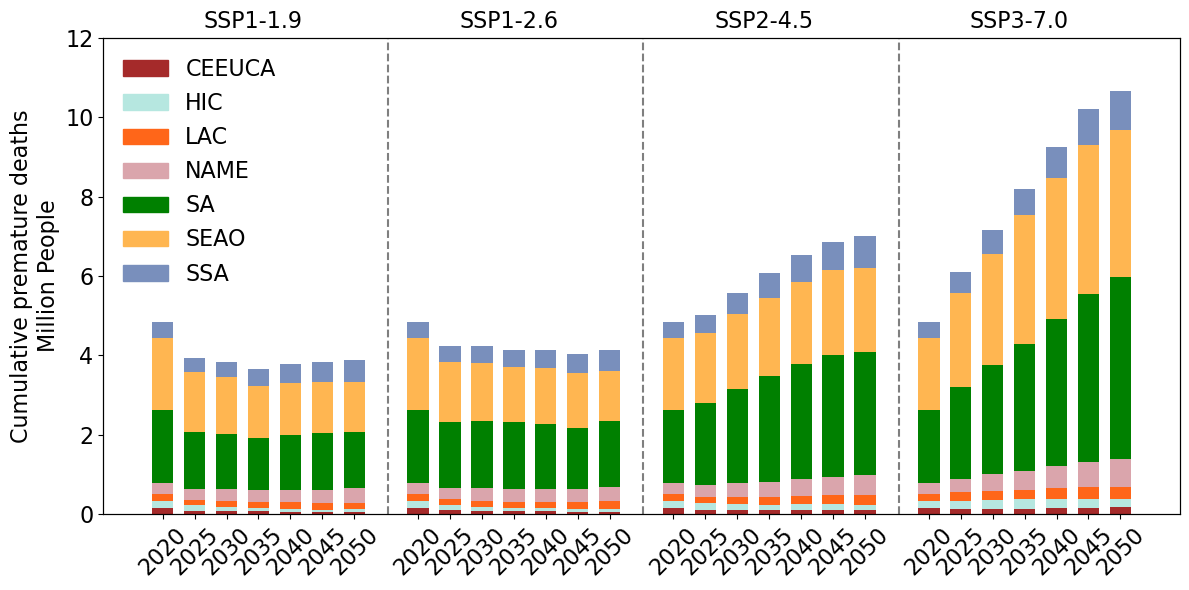

In [34]:
region_mapping = {
    'Central Europe, eastern Europe, and central Asia': 'CEEUCA',
    'High income': 'HIC',
    'Latin America and Caribbean': 'LAC',
    'North Africa and Middle East': 'NAME',
    'South Asia': 'SA',
    'Southeast Asia, east Asia, and Oceania': 'SEAO',
    'Sub-Saharan Africa': 'SSA',
}

colors = ['brown', '#B6E7E0', '#FF6619FF', '#DAA5AC', 'green', '#FFB651', '#798fbc']

country_order = list(region_mapping.keys()) 
legend_labels = list(region_mapping.values()) 

ssp_scenarios = ['SSP1-1.9', 'SSP1-2.6', 'SSP2-4.5', 'SSP3-7.0'] 
years = np.arange(2020, 2055, 5) 
num_years = len(years)

fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.2 
year_spacing = 0.1  
group_spacing = 0.3 

x_positions = np.arange(len(ssp_scenarios)) * (num_years * (bar_width + year_spacing) + group_spacing)

for j, scenario in enumerate(ssp_scenarios):
    ssp_df = regional_cumu_deaths[
        regional_cumu_deaths['Scenario'] == scenario
    ]

    pivot_df = ssp_df.pivot_table(index='Year', columns='GBD Region', values='total_delta_mort_AVG_adjusted')
    pivot_df = pivot_df.loc[years, country_order]

    bottom = np.zeros(num_years)

    for i, region in enumerate(country_order):
        ax.bar(x_positions[j] + np.arange(num_years) * (bar_width + year_spacing) - (num_years / 2) * (bar_width + year_spacing),  
               pivot_df[region], width=bar_width, bottom=bottom, 
               color=colors[i], label=legend_labels[i] if j == 0 else "")
        bottom += pivot_df[region]

    if j < len(ssp_scenarios) - 1:
        ax.axvline(x_positions[j] + num_years * (bar_width + year_spacing) - (num_years / 2) * (bar_width + year_spacing) + group_spacing / 20,
                   color='black', linestyle='--', alpha=0.5)

ax.set_ylabel('Cumulative premature deaths\nMillion People', fontsize=16)

xtick_positions = []
xtick_labels = []
for j, scenario in enumerate(ssp_scenarios):
    for k, year in enumerate(years):
        xtick_positions.append(x_positions[j] + k * (bar_width + year_spacing) - (num_years / 2) * (bar_width + year_spacing))
        xtick_labels.append(str(year))

ax.set_xticks(xtick_positions)
ax.set_xticklabels(xtick_labels, fontsize=16, rotation=45)

ssp_tick_positions = x_positions-0.2
ax2 = ax.twiny()
ax2.set_xticks(ssp_tick_positions)
ax2.set_xticklabels(ssp_scenarios, fontsize=16)
ax2.set_xlim(ax.get_xlim())  
ax2.tick_params(axis='x', length=0)

ax.tick_params(axis='y', labelsize=16)
ax.set_ylim(0, 12)

legend_patches = [mpatches.Patch(color=colors[i], label=legend_labels[i]) for i in range(len(legend_labels))]
ax.legend(handles=legend_patches, loc='upper left', fontsize=16, frameon=False, markerscale=2)

plt.tight_layout()
plt.show()

# Figure S - Life expectency at birth - regional 

In [26]:
regional_leab = pd.DataFrame(leab.merge(GBD_country_group, on=['iso_code'],how='left'))

regional_leab

,SSPs,Time,sex,agest,iso_code,Scenario,ex,ex.new_AVG,ex.new_LOW,ex.new_HIGH,ex_diff_AVG,ex_diff_LOW,ex_diff_HIGH,Population_total,Country,Region,GBD Region,Global
0,SSP1,2020.0,f,0,AFG,ssp119,65.431991,65.431990,65.431990,65.431990,-5.518742e-07,-5.518743e-07,-5.518742e-07,18957.4,Afghanistan,North Africa and Middle East,North Africa and Middle East,Global
1,SSP1,2025.0,f,0,AFG,ssp119,68.461696,68.622891,68.527668,68.767564,1.611945e-01,6.597164e-02,3.058678e-01,21676.2,Afghanistan,North Africa and Middle East,North Africa and Middle East,Global
2,SSP1,2030.0,f,0,AFG,ssp119,69.747324,69.880055,69.800141,70.003453,1.327315e-01,5.281701e-02,2.561291e-01,24380.3,Afghanistan,North Africa and Middle East,North Africa and Middle East,Global
3,SSP1,2035.0,f,0,AFG,ssp119,71.029809,71.125210,71.067723,71.216743,9.540132e-02,3.791385e-02,1.869339e-01,26966.3,Afghanistan,North Africa and Middle East,North Africa and Middle East,Global
4,SSP1,2040.0,f,0,AFG,ssp119,72.227582,72.409434,72.297581,72.593215,1.818513e-01,6.999868e-02,3.656327e-01,29377.5,Afghanistan,North Africa and Middle East,North Africa and Middle East,Global
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10491,SSP3,2030.0,m,0,ZWE,ssp370,55.744436,55.708408,55.734799,55.671117,-3.602813e-02,-9.637199e-03,-7.331932e-02,8882.4,Zimbabwe,Southern sub-Saharan Africa,Sub-Saharan Africa,Global
10492,SSP3,2035.0,m,0,ZWE,ssp370,56.193848,56.183074,56.190928,56.173299,-1.077408e-02,-2.920066e-03,-2.054928e-02,9673.0,Zimbabwe,Southern sub-Saharan Africa,Sub-Saharan Africa,Global
10493,SSP3,2040.0,m,0,ZWE,ssp370,56.624089,56.561985,56.607761,56.499813,-6.210442e-02,-1.632834e-02,-1.242763e-01,10454.4,Zimbabwe,Southern sub-Saharan Africa,Sub-Saharan Africa,Global
10494,SSP3,2045.0,m,0,ZWE,ssp370,57.042715,56.927719,57.013094,56.805294,-1.149960e-01,-2.962166e-02,-2.374215e-01,11188.4,Zimbabwe,Southern sub-Saharan Africa,Sub-Saharan Africa,Global


In [36]:
regional_leab_2020 = regional_leab[regional_leab['Time'] == 2020].groupby(['Scenario', 'GBD Region']).apply(
    lambda group: pd.Series({
        'weighted_ex_AVG': (group['ex.new_AVG'] * group['Population_total']).sum() / group['Population_total'].sum(),
        'original_ex': (group['ex'] * group['Population_total']).sum() / group['Population_total'].sum()
    })
).reset_index(drop=False) 

regional_leab_2050 = regional_leab[regional_leab['Time'] == 2050].groupby(['Scenario', 'GBD Region']).apply(
    lambda group: pd.Series({
        'weighted_ex_AVG': (group['ex.new_AVG'] * group['Population_total']).sum() / group['Population_total'].sum(),
        'original_ex': (group['ex'] * group['Population_total']).sum() / group['Population_total'].sum()
    })
).reset_index(drop=False)

leab_global_2020 = leab[leab['Time'] == 2020].groupby(['Scenario']).apply(
    lambda group: pd.Series({
        'weighted_ex_AVG': (group['ex.new_AVG'] * group['Population_total']).sum() / group['Population_total'].sum(),
        'original_ex': (group['ex'] * group['Population_total']).sum() / group['Population_total'].sum()
    })
).reset_index(drop=False)
leab_global_2020['GBD Region'] = 'Global'

leab_global_2050 = leab[leab['Time'] == 2050].groupby(['Scenario']).apply(
    lambda group: pd.Series({
        'weighted_ex_AVG': (group['ex.new_AVG'] * group['Population_total']).sum() / group['Population_total'].sum(),
        'original_ex': (group['ex'] * group['Population_total']).sum() / group['Population_total'].sum()
    })
).reset_index(drop=False)
leab_global_2050['GBD Region'] = 'Global'

regional_leab_2020 = pd.concat([regional_leab_2020, leab_global_2020], ignore_index=True)
regional_leab_2050 = pd.concat([regional_leab_2050, leab_global_2050], ignore_index=True)

leab_combined = pd.merge(
    regional_leab_2020, regional_leab_2050,
    on=['Scenario', 'GBD Region'],
    suffixes=('_2020', '_2050')
).replace({'Scenario': {'ssp119': 'SSP1-1.9', 'ssp126': 'SSP1-2.6', 'ssp245': 'SSP2-4.5', 'ssp370': 'SSP3-7.0'}})

leab_combined

/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_79003/3547882858.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  regional_leab_2020 = regional_leab[regional_leab['Time'] == 2020].groupby(['Scenario', 'GBD Region']).apply(
/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_79003/3547882858.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  regional_leab_2050 = regional_leab[regional_l

,Scenario,GBD Region,weighted_ex_AVG_2020,original_ex_2020,weighted_ex_AVG_2050,original_ex_2050
0,SSP1-1.9,"Central Europe, eastern Europe, and central Asia",72.791596,72.791595,84.488356,84.403674
1,SSP1-1.9,High income,80.630344,80.630345,92.061925,92.032228
2,SSP1-1.9,Latin America and Caribbean,72.724317,72.724316,86.123509,86.050655
3,SSP1-1.9,North Africa and Middle East,72.117102,72.117102,82.987076,82.924575
4,SSP1-1.9,South Asia,69.857063,69.857061,81.044005,80.258583
5,SSP1-1.9,"Southeast Asia, east Asia, and Oceania",76.063701,76.063701,85.585200,85.374782
6,SSP1-1.9,Sub-Saharan Africa,60.667516,60.667516,73.886522,73.800907
7,SSP1-2.6,"Central Europe, eastern Europe, and central Asia",72.791596,72.791595,84.488402,84.403674
8,SSP1-2.6,High income,80.630344,80.630345,92.056635,92.032228
9,SSP1-2.6,Latin America and Caribbean,72.724317,72.724316,86.088314,86.050655


In [37]:
regional_leab_2050 = regional_leab.groupby(['Scenario', 'GBD Region','Time']).apply(
    lambda group: pd.Series({
        'weighted_ex_diff_AVG': (group['ex_diff_AVG'] * group['Population_total']).sum() / group['Population_total'].sum(),
        'weighted_ex_diff_LOW': (group['ex_diff_LOW'] * group['Population_total']).sum() / group['Population_total'].sum(),
        'weighted_ex_diff_HIGH': (group['ex_diff_HIGH'] * group['Population_total']).sum() / group['Population_total'].sum()
    })
).reset_index().replace({'Scenario': {'ssp119': 'SSP1-1.9', 'ssp126': 'SSP1-2.6', 'ssp245': 'SSP2-4.5', 'ssp370': 'SSP3-7.0'}})


regional_leab_2050_global = leab.groupby(['Scenario','Time']).apply(
    lambda group: pd.Series({
        'weighted_ex_diff_AVG': (group['ex_diff_AVG'] * group['Population_total']).sum() / group['Population_total'].sum(),
        'weighted_ex_diff_LOW': (group['ex_diff_LOW'] * group['Population_total']).sum() / group['Population_total'].sum(),
        'weighted_ex_diff_HIGH': (group['ex_diff_HIGH'] * group['Population_total']).sum() / group['Population_total'].sum()
    })
).reset_index().replace({'Scenario': {'ssp119': 'SSP1-1.9', 'ssp126': 'SSP1-2.6', 'ssp245': 'SSP2-4.5', 'ssp370': 'SSP3-7.0'}})

regional_leab_2050_global['GBD Region'] = 'Global' 

regional_leab_2050 = pd.concat([regional_leab_2050, regional_leab_2050_global])

regional_leab_2050 = regional_leab_2050[regional_leab_2050['Time']==2050][['Scenario', 'GBD Region', 'weighted_ex_diff_AVG',
       'weighted_ex_diff_LOW', 'weighted_ex_diff_HIGH']]

regional_leab_2050

/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_79003/3145511201.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  regional_leab_2050 = regional_leab.groupby(['Scenario', 'GBD Region','Time']).apply(
/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_79003/3145511201.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  regional_leab_2050_global = leab.groupby(['Scenario','Time']).apply(

,Scenario,GBD Region,weighted_ex_diff_AVG,weighted_ex_diff_LOW,weighted_ex_diff_HIGH
6,SSP1-1.9,"Central Europe, eastern Europe, and central Asia",8.468259e-02,3.227443e-02,1.621524e-01
13,SSP1-1.9,High income,2.969617e-02,7.710747e-03,6.668476e-02
20,SSP1-1.9,Latin America and Caribbean,7.285407e-02,2.588255e-02,1.530166e-01
27,SSP1-1.9,North Africa and Middle East,6.250096e-02,2.655340e-02,1.211500e-01
34,SSP1-1.9,South Asia,7.854216e-01,3.466458e-01,1.512033e+00
41,SSP1-1.9,"Southeast Asia, east Asia, and Oceania",2.104178e-01,1.009453e-01,3.664851e-01
48,SSP1-1.9,Sub-Saharan Africa,8.561508e-02,3.051814e-02,1.727931e-01
55,SSP1-2.6,"Central Europe, eastern Europe, and central Asia",8.472780e-02,3.422801e-02,1.566549e-01
62,SSP1-2.6,High income,2.440636e-02,6.084711e-03,5.624660e-02
69,SSP1-2.6,Latin America and Caribbean,3.765959e-02,1.430375e-02,7.679541e-02


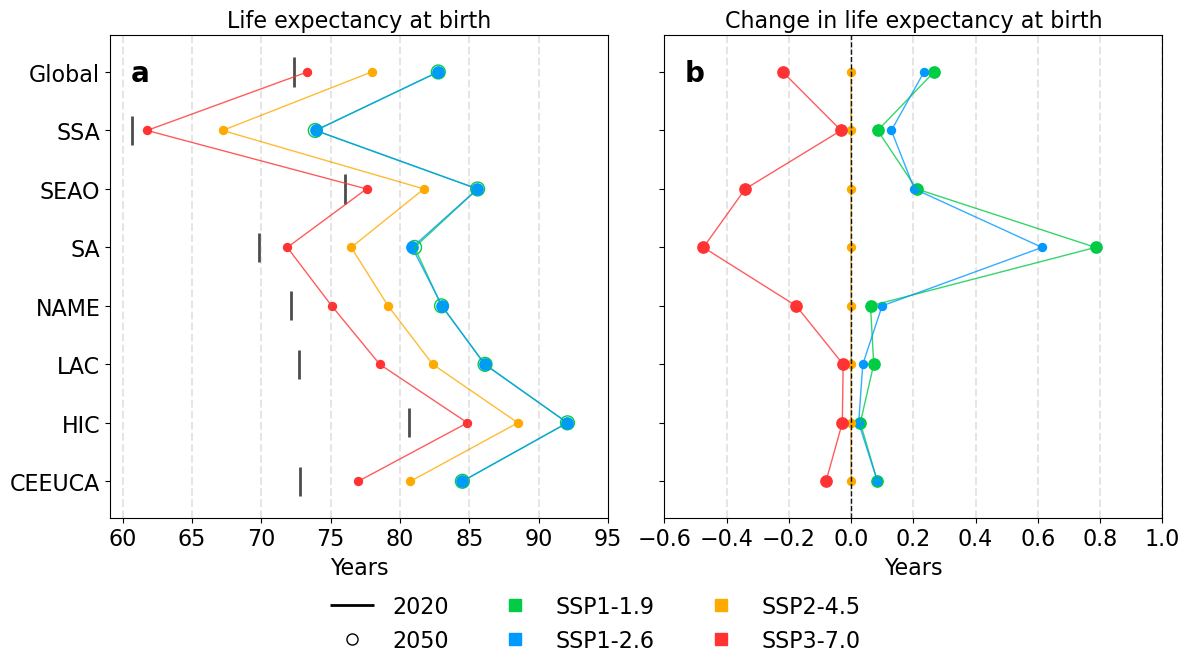

In [44]:
short_region_names = {
    'Central Europe, eastern Europe, and central Asia': 'CEEUCA',
    'High income': 'HIC',
    'Latin America and Caribbean': 'LAC',
    'North Africa and Middle East': 'NAME',
    'South Asia': 'SA',
    'Southeast Asia, east Asia, and Oceania': 'SEAO',
    'Sub-Saharan Africa': 'SSA',
    'Global': 'Global'
}

region_order = [
    
    'Central Europe, eastern Europe, and central Asia',
    'High income',
    'Latin America and Caribbean',
    'North Africa and Middle East',
    'South Asia',
    'Southeast Asia, east Asia, and Oceania',
    'Sub-Saharan Africa',
    'Global'
]

scenario_colors = {
    'SSP1-1.9': '#00CC44',  
    'SSP1-2.6': '#0099FF',  
    'SSP2-4.5': '#FFAA00', 
    'SSP3-7.0': '#FF3333'
}

short_region_order = [short_region_names[region] for region in region_order]

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

ax1 = axes[0]

scenario_2050_values = {scenario: [] for scenario in scenario_colors.keys()}

for i, region in enumerate(region_order):

    region_data = leab_combined[leab_combined['GBD Region'] == region]
    
    if not region_data.empty:

        x_2020 = region_data['weighted_ex_AVG_2020'].values[0]

        ax1.vlines(x=x_2020, ymin=i - 0.25, ymax=i + 0.25, color='black', linestyle='-', alpha=0.7, linewidth=2)
        

        for _, row in region_data.iterrows():
            scenario = row['Scenario']
            x_2050 = row['weighted_ex_AVG_2050']
            scenario_2050_values[scenario].append((x_2050, i)) 

for scenario, values in scenario_2050_values.items():
    if values:
        x_vals, y_vals = zip(*values)
        
        if scenario == 'SSP1-1.9':
            ax1.scatter(x_vals, y_vals, color=scenario_colors[scenario], s=99, facecolor='none', label=scenario)
        elif scenario == 'SSP1-2.6':
            ax1.scatter(x_vals, y_vals, color=scenario_colors[scenario], s=66, label=scenario)
        else:    
            ax1.scatter(x_vals, y_vals, color=scenario_colors[scenario], s=33, label=scenario)
        
        ax1.plot(x_vals, y_vals, color=scenario_colors[scenario], alpha=0.8, linewidth=1, linestyle='-')

ax1.set_xlabel('Years', fontsize=16)
ax1.set_xticks(np.arange(60, 96, step=5))
ax1.set_title('Life expectancy at birth', fontsize=16)
ax1.set_yticks(ticks=range(len(short_region_order)), labels=short_region_order, fontsize=14)

ax1.text(0.08, 0.95, 'a', transform=ax1.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)

for x in np.arange(60, 95, 5):
    ax1.axvline(x=x, color='grey', linestyle='--', alpha=0.2)

ax1.grid(False)

ax2 = axes[1]

region_map = {region: i for i, region in enumerate(region_order)}

scenario_ex_diff_values = {scenario: [] for scenario in scenario_colors.keys()}

for scenario, color in scenario_colors.items():
    subset = regional_leab_2050[regional_leab_2050['Scenario'] == scenario]  
    for _, row in subset.iterrows():
        region = row['GBD Region']
        if region in region_map:  
            y_pos = region_map[region]  
            x_val = row['weighted_ex_diff_AVG']
            scenario_ex_diff_values[scenario].append((x_val, y_pos))  

for scenario, values in scenario_ex_diff_values.items():
    if values:
        values.sort(key=lambda v: v[1])  
        
        x_vals, y_vals = zip(*values)
        
        if scenario == 'SSP1-1.9':
            ax2.scatter(x_vals, y_vals, color=scenario_colors[scenario], s=66, label=scenario)
        elif scenario == 'SSP3-7.0':
            ax2.scatter(x_vals, y_vals, color=scenario_colors[scenario], s=66, label=scenario)
        else:    
            ax2.scatter(x_vals, y_vals, color=scenario_colors[scenario], s=33, label=scenario)
        
        ax2.plot(x_vals, y_vals, color=scenario_colors[scenario], alpha=0.8, linewidth=1, linestyle='-')

ax2.set_xlabel('Years', fontsize=16)
ax2.axvline(x=0, color='black', linewidth=1, linestyle='--')
ax2.tick_params(axis='x', labelsize=16)
ax2.set_xticks(np.arange(-0.6, 1.1, step=0.2))
ax2.text(0.08, 0.95, 'b', transform=ax2.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
ax2.set_title('Change in life expectancy at birth', fontsize=16)

handles = [plt.Line2D([0], [0], color=color, marker='s', linestyle='', markersize=8, label=scenario) 
           for scenario, color in scenario_colors.items()]

handles.insert(0, plt.Line2D([0], [0], color='black', linestyle='', marker='o', markersize=8, markerfacecolor='none', label='2050', solid_capstyle='butt'))
handles.insert(0, plt.Line2D([0], [0], color='black', linestyle='-', linewidth=2, label='2020', solid_capstyle='butt'))

fig.legend(handles=handles, loc='lower center', bbox_to_anchor=(0.5, -0.13), fontsize=16, frameon=False, ncol=3)

ax2.grid(False)
for x in np.arange(-0.6, 1.1, 0.2):
    ax2.axvline(x=x, color='grey', linestyle='--', alpha=0.2)

plt.tight_layout()
plt.show()


# Figure S - cumulative premature deaths trend by age groups/diseases

In [60]:
age_cumu_deaths = change_cumu_deaths_fill.groupby(by=['Scenario','age','Year'])[['total_delta_mort_AVG_adjusted','total_delta_mort_AVG_diff']].sum().div(1e3).reset_index()

age_bins = [-1, 24, 64, float('inf')] 
age_labels = ['Under 25', '25-64', '65+']

age_cumu_deaths['age_group'] = pd.cut(age_cumu_deaths['age'], bins=age_bins, labels=age_labels)

age_cumu_deaths = age_cumu_deaths.groupby(by=['Scenario','age_group','Year'])[['total_delta_mort_AVG_adjusted','total_delta_mort_AVG_diff']].sum().reset_index()

total_mort_per_scenario_reference = age_cumu_deaths.groupby(by=['Scenario','Year'])[['total_delta_mort_AVG_adjusted']].sum().reset_index()
total_mort_per_scenario_reference.rename(columns={'total_delta_mort_AVG_adjusted': 'total_mort_scenario'}, inplace=True)

age_cumu_deaths = age_cumu_deaths.merge(total_mort_per_scenario_reference, on=['Scenario','Year'], how='left')

age_cumu_deaths['Percentage'] = (age_cumu_deaths['total_delta_mort_AVG_adjusted'] / age_cumu_deaths['total_mort_scenario']) * 100

age_cumu_deaths['Scenario'] = age_cumu_deaths['Scenario'].replace({'SSP119':'SSP1-1.9','SSP126':'SSP1-2.6', 'SSP245':'SSP2-4.5','SSP370':'SSP3-7.0'})

age_cumu_deaths['total_delta_mort_AVG_adjusted'] = age_cumu_deaths['total_delta_mort_AVG_adjusted']

age_cumu_deaths


/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_23933/203154657.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_cumu_deaths = age_cumu_deaths.groupby(by=['Scenario','age_group','Year'])[['total_delta_mort_AVG_adjusted','total_delta_mort_AVG_diff']].sum().reset_index()


,Scenario,age_group,Year,total_delta_mort_AVG_adjusted,total_delta_mort_AVG_diff,total_mort_scenario,Percentage
0,SSP1-1.9,Under 25,2020,0.180093,0.000000,4.831246,3.727672
1,SSP1-1.9,Under 25,2021,0.169861,-0.000980,4.650827,3.652266
2,SSP1-1.9,Under 25,2022,0.159630,-0.001959,4.470472,3.570773
3,SSP1-1.9,Under 25,2023,0.149400,-0.002939,4.290117,3.482429
4,SSP1-1.9,Under 25,2024,0.139170,-0.003918,4.109761,3.386331
...,...,...,...,...,...,...,...
367,SSP3-7.0,65+,2046,8.153841,0.702178,10.288013,79.255742
368,SSP3-7.0,65+,2047,8.250806,0.722784,10.380860,79.480947
369,SSP3-7.0,65+,2048,8.347771,0.743390,10.473708,79.702158
370,SSP3-7.0,65+,2049,8.444736,0.763997,10.566556,79.919482


In [61]:
age_cumu_deaths[age_cumu_deaths['Year'] == 2050]

,Scenario,age_group,Year,total_delta_mort_AVG_adjusted,total_delta_mort_AVG_diff,total_mort_scenario,Percentage
30,SSP1-1.9,Under 25,2050,0.036790,-0.001189,3.892249,0.945219
61,SSP1-1.9,25-64,2050,0.561600,-0.056662,3.892249,14.428678
92,SSP1-1.9,65+,2050,3.293859,-0.354057,3.892249,84.626103
123,SSP1-2.6,Under 25,2050,0.035121,-0.001722,4.139933,0.848338
154,SSP1-2.6,25-64,2050,0.590751,-0.056249,4.139933,14.269590
185,SSP1-2.6,65+,2050,3.514061,-0.341681,4.139933,84.882072
216,SSP2-4.5,Under 25,2050,0.107817,0.000000,7.001070,1.540001
247,SSP2-4.5,25-64,2050,1.155188,0.000000,7.001070,16.500159
278,SSP2-4.5,65+,2050,5.738066,0.000000,7.001070,81.959840
309,SSP3-7.0,Under 25,2050,0.245277,0.004263,10.659524,2.301011


In [65]:
change_cumu_deaths_fill

,SSPs,Year,sex,iso_code,age,mx,Scenario,Population,COP_delta_mort_AVG_adjusted,COP_delta_mort_LOW_adjusted,...,LUN_delta_mort_HIGH_diff,STR_delta_mort_AVG_diff,STR_delta_mort_LOW_diff,STR_delta_mort_HIGH_diff,TDM_delta_mort_AVG_diff,TDM_delta_mort_LOW_diff,TDM_delta_mort_HIGH_diff,total_delta_mort_AVG_diff,total_delta_mort_LOW_diff,total_delta_mort_HIGH_diff
0,SSP1,2020,f,AFG,0.0,0.011760,SSP1-1.9,3087.40,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
1,SSP1,2021,f,AFG,0.0,0.011089,SSP1-1.9,3101.88,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-0.002506,-0.000021,-0.007346
2,SSP1,2022,f,AFG,0.0,0.010417,SSP1-1.9,3116.36,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-0.005012,-0.000041,-0.014692
3,SSP1,2023,f,AFG,0.0,0.009746,SSP1-1.9,3130.84,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-0.007518,-0.000062,-0.022039
4,SSP1,2024,f,AFG,0.0,0.009074,SSP1-1.9,3145.32,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-0.010024,-0.000083,-0.029385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972211,SSP3,2046,m,ZWE,100.0,0.482033,SSP3-7.0,0.10,0.000053,0.000036,...,1.458089e-07,0.000003,0.000002,0.000005,0.000002,5.125166e-07,0.000003,0.000057,0.000006,0.000157
972212,SSP3,2047,m,ZWE,100.0,0.481921,SSP3-7.0,0.10,0.000054,0.000037,...,1.441616e-07,0.000003,0.000002,0.000005,0.000001,4.958434e-07,0.000003,0.000056,0.000006,0.000153
972213,SSP3,2048,m,ZWE,100.0,0.481810,SSP3-7.0,0.10,0.000055,0.000038,...,1.425144e-07,0.000003,0.000002,0.000004,0.000001,4.791702e-07,0.000003,0.000054,0.000006,0.000149
972214,SSP3,2049,m,ZWE,100.0,0.481698,SSP3-7.0,0.10,0.000057,0.000039,...,1.408672e-07,0.000003,0.000002,0.000004,0.000001,4.624970e-07,0.000003,0.000053,0.000005,0.000145


In [75]:
diseases = ['STR', 'LUN', 'LRI', 'IHD', 'TDM', 'COP']
disease_labels = ['Stroke', 'Lung Cancer', 'Lower Respiratory Tract Infection (LRI)', 
                  'Ischemic Heart Disease (IHD)', 'Type 2 Diabetes', 
                  'Chronic Obstructive Pulmonary Disease (COPD)']

disease_columns_avg = [f'{d}_delta_mort_AVG_adjusted' for d in diseases]

disease_cumu_deaths = change_cumu_deaths_fill.groupby(['Scenario', 'Year'])[disease_columns_avg].sum().div(1e3).reset_index()

disease_cumu_deaths = disease_cumu_deaths.melt(id_vars=['Scenario', 'Year'], 
                                               value_vars=disease_columns_avg,
                                               var_name='Disease', 
                                               value_name='total_delta_mort_AVG_adjusted')

disease_cumu_deaths['Disease'] = disease_cumu_deaths['Disease'].str.replace('_delta_mort_AVG_adjusted', '', regex=False)
disease_label_map = dict(zip(diseases, disease_labels))
disease_cumu_deaths['Disease'] = disease_cumu_deaths['Disease'].map(disease_label_map)

total_mort_disease_reference = disease_cumu_deaths.groupby(['Scenario', 'Year'])[['total_delta_mort_AVG_adjusted']].sum().reset_index()
total_mort_disease_reference.rename(columns={'total_delta_mort_AVG_adjusted': 'total_mort_scenario'}, inplace=True)

disease_cumu_deaths = disease_cumu_deaths.merge(total_mort_disease_reference, on=['Scenario', 'Year'], how='left')
disease_cumu_deaths['Percentage'] = (disease_cumu_deaths['total_delta_mort_AVG_adjusted'] / disease_cumu_deaths['total_mort_scenario']) * 100

disease_cumu_deaths['Scenario'] = disease_cumu_deaths['Scenario'].replace({
    'SSP119':'SSP1-1.9',
    'SSP126':'SSP1-2.6', 
    'SSP245':'SSP2-4.5',
    'SSP370':'SSP3-7.0'
})

disease_cumu_deaths.sort_values(by=['Year','Scenario'])[694:744]


,Scenario,Year,Disease,total_delta_mort_AVG_adjusted,total_mort_scenario,Percentage
617,SSP3-7.0,2048,Type 2 Diabetes,0.531968,10.473708,5.079083
741,SSP3-7.0,2048,Chronic Obstructive Pulmonary Disease (COPD),2.875143,10.473708,27.451047
29,SSP1-1.9,2049,Stroke,0.811720,3.879844,20.921463
153,SSP1-1.9,2049,Lung Cancer,0.202913,3.879844,5.229923
277,SSP1-1.9,2049,Lower Respiratory Tract Infection (LRI),0.483610,3.879844,12.464672
401,SSP1-1.9,2049,Ischemic Heart Disease (IHD),1.251237,3.879844,32.249677
525,SSP1-1.9,2049,Type 2 Diabetes,0.341827,3.879844,8.810327
649,SSP1-1.9,2049,Chronic Obstructive Pulmonary Disease (COPD),0.788537,3.879844,20.323938
60,SSP1-2.6,2049,Stroke,0.853866,4.118733,20.731268
184,SSP1-2.6,2049,Lung Cancer,0.208846,4.118733,5.070630


In [77]:
diseases = ['STR', 'LUN', 'LRI', 'IHD', 'TDM', 'COP']
disease_labels = ['Stroke', 'Lung Cancer', 'Lower Respiratory Tract Infection (LRI)', 
                  'Ischemic Heart Disease (IHD)', 'Type 2 Diabetes', 
                  'Chronic Obstructive Pulmonary Disease (COPD)']

disease_columns_avg = [f'{d}_delta_mort_AVG_adjusted' for d in diseases]

disease_cumu_deaths = change_cumu_deaths_fill.groupby(['Scenario'])[disease_columns_avg].sum().div(1e3).reset_index()

disease_cumu_deaths = disease_cumu_deaths.melt(id_vars=['Scenario'], 
                                               value_vars=disease_columns_avg,
                                               var_name='Disease', 
                                               value_name='total_delta_mort_AVG_adjusted')

disease_cumu_deaths['Disease'] = disease_cumu_deaths['Disease'].str.replace('_delta_mort_AVG_adjusted', '', regex=False)
disease_label_map = dict(zip(diseases, disease_labels))
disease_cumu_deaths['Disease'] = disease_cumu_deaths['Disease'].map(disease_label_map)

total_mort_disease_reference = disease_cumu_deaths.groupby(['Scenario'])[['total_delta_mort_AVG_adjusted']].sum().reset_index()
total_mort_disease_reference.rename(columns={'total_delta_mort_AVG_adjusted': 'total_mort_scenario'}, inplace=True)

disease_cumu_deaths = disease_cumu_deaths.merge(total_mort_disease_reference, on=['Scenario'], how='left')
disease_cumu_deaths['Percentage'] = (disease_cumu_deaths['total_delta_mort_AVG_adjusted'] / disease_cumu_deaths['total_mort_scenario']) * 100

disease_cumu_deaths['Scenario'] = disease_cumu_deaths['Scenario'].replace({
    'SSP119':'SSP1-1.9',
    'SSP126':'SSP1-2.6', 
    'SSP245':'SSP2-4.5',
    'SSP370':'SSP3-7.0'
})

disease_cumu_deaths.sort_values(by=['Disease'])

,Scenario,Disease,total_delta_mort_AVG_adjusted,total_mort_scenario,Percentage
23,SSP3-7.0,Chronic Obstructive Pulmonary Disease (COPD),58.861007,250.948698,23.455395
21,SSP1-2.6,Chronic Obstructive Pulmonary Disease (COPD),25.139871,130.745721,19.228064
20,SSP1-1.9,Chronic Obstructive Pulmonary Disease (COPD),22.218713,121.409395,18.300653
22,SSP2-4.5,Chronic Obstructive Pulmonary Disease (COPD),40.663722,185.580175,21.911674
15,SSP3-7.0,Ischemic Heart Disease (IHD),80.450248,250.948698,32.058444
14,SSP2-4.5,Ischemic Heart Disease (IHD),62.629190,185.580175,33.747780
13,SSP1-2.6,Ischemic Heart Disease (IHD),45.909323,130.745721,35.113442
12,SSP1-1.9,Ischemic Heart Disease (IHD),42.551136,121.409395,35.047647
10,SSP2-4.5,Lower Respiratory Tract Infection (LRI),19.852132,185.580175,10.697334
11,SSP3-7.0,Lower Respiratory Tract Infection (LRI),25.966870,250.948698,10.347481


/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_23933/2864605746.py:25: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = ssp_df.pivot_table(index='Year', columns='age_group', values='total_delta_mort_AVG_adjusted')[age_order]
/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_23933/2864605746.py:25: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = ssp_df.pivot_table(index='Year', columns='age_group', values='total_delta_mort_AVG_adjusted')[age_order]
/var/folders/w_/v7dhjtc519b5xkcdsf_td1480000gp/T/ipykernel_23933/2864605746.py:25: FutureWarning: The default value of observed=False is deprecated and will change to observed=True i

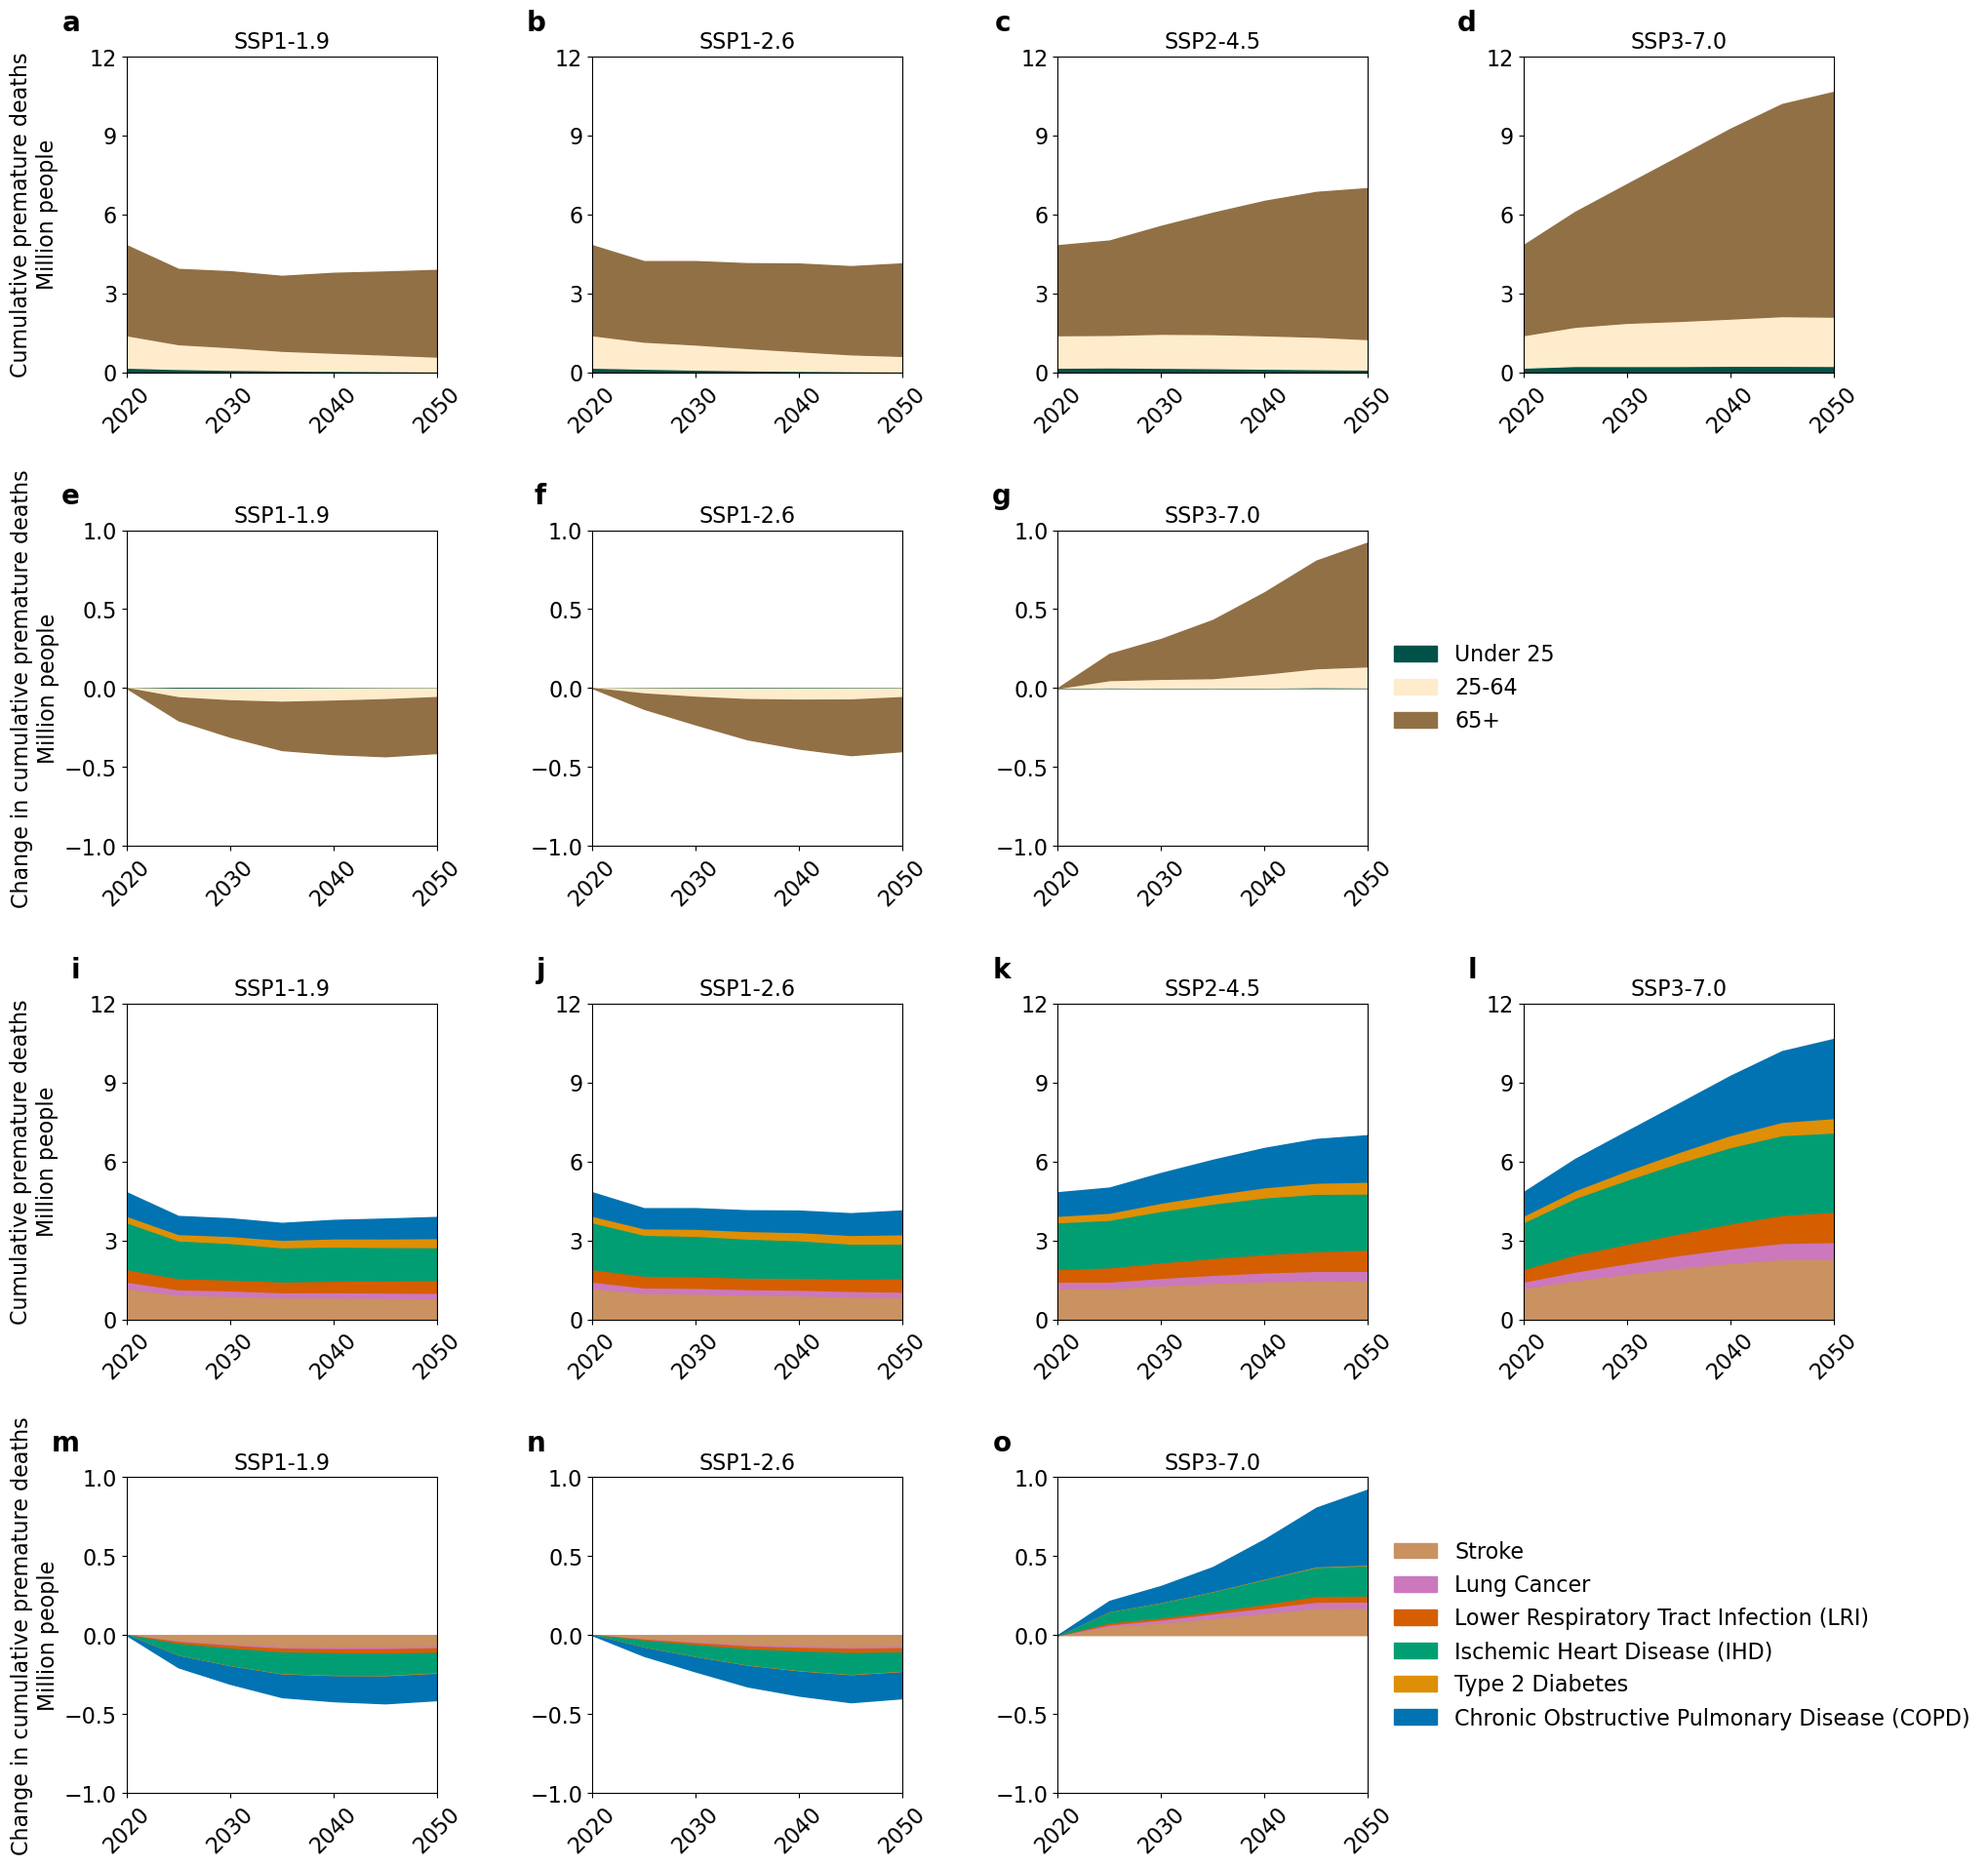

In [62]:
age_colors = ['#005248', '#ffeccc', '#917045', '#e09d31']
disease_colors = ['#ca9161', '#cc78bc', '#d55e00', '#029e73', '#de8f05', '#0173b2']

age_order = ['Under 25', '25-64', '65+']
diseases = ['STR', 'LUN', 'LRI', 'IHD', 'TDM', 'COP']
disease_labels = ['Stroke', 'Lung Cancer', 'Lower Respiratory Tract Infection (LRI)', 
                  'Ischemic Heart Disease (IHD)', 'Type 2 Diabetes', 
                  'Chronic Obstructive Pulmonary Disease (COPD)']


suffix_avg = '_delta_mort_AVG_adjusted'
suffix_diff = '_delta_mort_AVG_diff'
disease_columns_avg = [d + suffix_avg for d in diseases]
disease_columns_diff = [d + suffix_diff for d in diseases]


top_scenarios = ['SSP1-1.9', 'SSP1-2.6', 'SSP2-4.5', 'SSP3-7.0']
bottom_scenarios = ['SSP1-1.9', 'SSP1-2.6', 'SSP3-7.0']

fig, axes = plt.subplots(4, 4, figsize=(20, 20), gridspec_kw={'height_ratios': [1, 1, 1, 1]})

for i, scenario in enumerate(top_scenarios):
    ax = axes[0, i]
    ssp_df = age_cumu_deaths[age_cumu_deaths['Scenario'] == scenario]
    pivot_df = ssp_df.pivot_table(index='Year', columns='age_group', values='total_delta_mort_AVG_adjusted')[age_order]
    
    years = pivot_df.index
    y_stack = np.zeros(len(years))
    
    for j, age_group in enumerate(age_order):
        ax.fill_between(years, y_stack, y_stack + pivot_df[age_group], color=age_colors[j], label=age_group)
        y_stack += pivot_df[age_group]
    
    ax.set_title(scenario, fontsize=16)
    ax.set_xticks(np.arange(2020, 2051, step=10))
    ax.set_xlim(2020, 2050)
    ax.tick_params(axis='x', labelsize=16, rotation=45)
    ax.tick_params(axis='y', labelsize=16)
    ax.set_ylim(0, 12)
    ax.set_yticks(np.arange(0, 13, step=3))
    
    if i == 0:
        ax.set_ylabel('Cumulative premature deaths\nMillion people\n', fontsize=16)


for i, scenario in enumerate(bottom_scenarios):
    ax = axes[1, i]
    ssp_df = age_cumu_deaths[age_cumu_deaths['Scenario'] == scenario]
    pivot_df = ssp_df.pivot_table(index='Year', columns='age_group', values='total_delta_mort_AVG_diff')[age_order]
    
    years = pivot_df.index
    y_stack = np.zeros(len(years))
    
    for j, age_group in enumerate(age_order):
        ax.fill_between(years, y_stack, y_stack + pivot_df[age_group], color=age_colors[j])
        y_stack += pivot_df[age_group]
    
    ax.set_title(scenario, fontsize=16)
    ax.set_xticks(np.arange(2020, 2051, step=10))
    ax.set_xlim(2020, 2050)
    ax.tick_params(axis='x', labelsize=16, rotation=45)
    ax.tick_params(axis='y', labelsize=16)
    ax.set_ylim(-1, 1)
    ax.set_yticks(np.arange(-1, 1.1, step=0.5))
    
    if i == 0:
        ax.set_ylabel('Change in cumulative premature deaths\nMillion people', fontsize=16)
    if i == 2:
        ax.legend(age_order, loc='center left', bbox_to_anchor=(1.02, 0.5), 
                 frameon=False, fontsize=16)

for i, scenario in enumerate(top_scenarios):
    ax = axes[2, i]
    scenario_data = change_cumu_deaths_fill[change_cumu_deaths_fill['Scenario'] == scenario]
    
    grouped = scenario_data.groupby('Year').agg({
        col: lambda x: x.sum() / 1e3 for col in disease_columns_avg
    }).reset_index()
    
    years = grouped['Year']
    y_stack = np.zeros(len(years))
    
    for j, disease in enumerate(disease_columns_avg):
        ax.fill_between(years, y_stack, y_stack + grouped[disease], color=disease_colors[j], label=disease_labels[j])
        y_stack += grouped[disease]
    
    ax.set_title(scenario, fontsize=16)
    ax.set_xticks(np.arange(2020, 2051, step=10))
    ax.set_xlim(2020, 2050)
    ax.tick_params(axis='x', labelsize=16, rotation=45)
    ax.tick_params(axis='y', labelsize=16)
    ax.set_ylim(0, 12)
    ax.set_yticks(np.arange(0, 13, step=3))
    
    if i == 0:
        ax.set_ylabel('Cumulative premature deaths\nMillion people\n', fontsize=16)


for i, scenario in enumerate(bottom_scenarios):
    ax = axes[3, i]
    scenario_data = change_cumu_deaths_fill[change_cumu_deaths_fill['Scenario'] == scenario]
    

    grouped = scenario_data.groupby('Year').agg({
        col: lambda x: x.sum() / 1e3 for col in disease_columns_diff
    }).reset_index()
    
    years = grouped['Year']
    y_stack = np.zeros(len(years))
    
    for j, disease in enumerate(disease_columns_diff):
        ax.fill_between(years, y_stack, y_stack + grouped[disease], color=disease_colors[j])
        y_stack += grouped[disease]
    
    ax.set_title(scenario, fontsize=16)
    ax.set_xticks(np.arange(2020, 2051, step=10))
    ax.set_xlim(2020, 2050)
    ax.tick_params(axis='x', labelsize=16, rotation=45)
    ax.tick_params(axis='y', labelsize=16)
    ax.set_ylim(-1, 1)
    ax.set_yticks(np.arange(-1, 1.1, step=0.5))
    
    if i == 0:
        ax.set_ylabel('Change in cumulative premature deaths\nMillion people', fontsize=16)
    if i == 2:
        ax.legend(disease_labels, loc='center left', bbox_to_anchor=(1.02, 0.5), 
                 frameon=False, fontsize=16)
        
subplot_labels = list('abcdefghijklmno') 
for idx, ax in enumerate(axes.flat):
    if ax.has_data():  
        ax.text(-0.15, 1.15, subplot_labels[idx], transform=ax.transAxes,
                fontsize=20, fontweight='bold', va='top', ha='right')



for i in range(1, 4):
    axes[1, 3].axis('off')
    axes[3, 3].axis('off')


fig.tight_layout()
plt.subplots_adjust(right=1, top=1,wspace=0.5, hspace=0.5)

plt.show()